In [9]:
%matplotlib inline
from conventional_mc import *
import pickle

In [2]:
# RL method
my_positions_list, weights_list, starting_configs_list  = RL_simulation(
    init_simulation_steps=4000,
    num_clusters=50, num_rounds=23, num_clusters_for_consideration=10, num_starting_points=2,
    num_steps_each_round=1000)

conventional_mc.py:70: RuntimeWarning: overflow encountered in power
  np.dot(np.diag(48 * sigma_12 / np.power(distances, 14) - 24 * sigma_6 / np.power(distances, 8)),


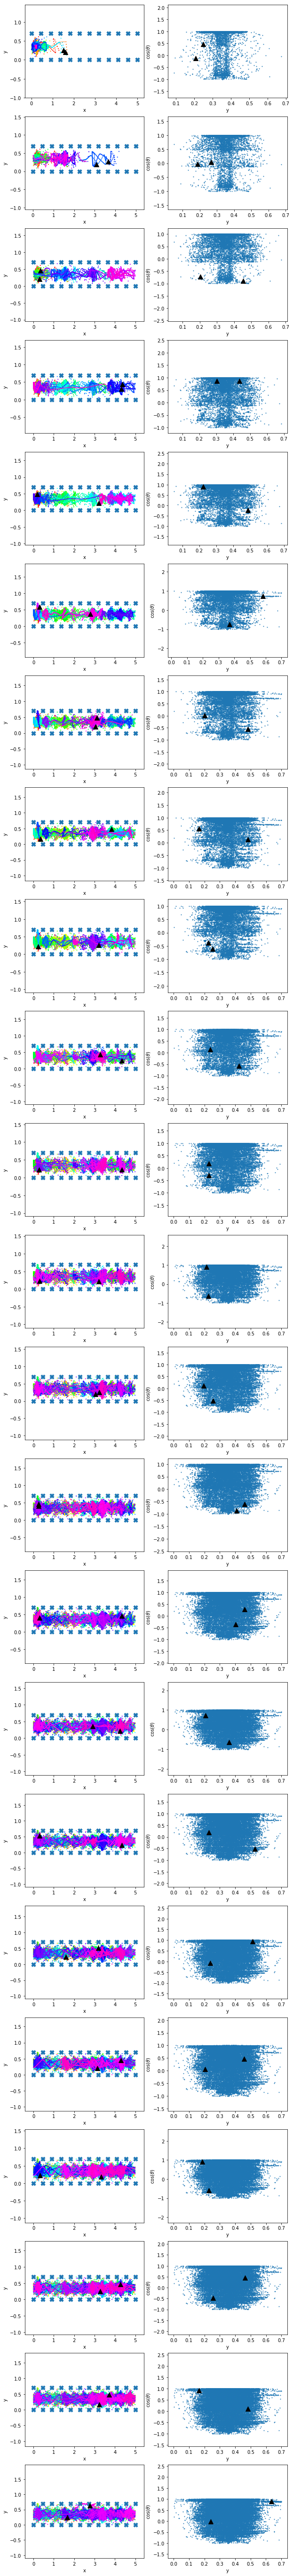

In [3]:
# RL method visualization for each iteration
fig, axes = plt.subplots(len(starting_configs_list), 2)
for index, item in enumerate(starting_configs_list):
    x = np.concatenate(my_positions_list[:index + 1])
    ax = axes[index][0]
    ax.scatter(x[:,0],x[:,1], s=1, c=range(len(x)), cmap='gist_rainbow')
    ax.scatter(coords_particles[:,0], coords_particles[:,1], marker='X', s=80)
    ax.scatter(item[:, 0], item[:, 1], marker='^',c='black', s=100)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    ax = axes[index][1]
    ax.scatter(x[:,1], np.cos(x[:,2]), s=1)
    ax.scatter(item[:, 1], item[:, 2], marker='^', c='black', s=100)
    ax.set_xlabel('y'); ax.set_ylabel('cos($\\theta$)')
fig.set_size_inches(10, 100)

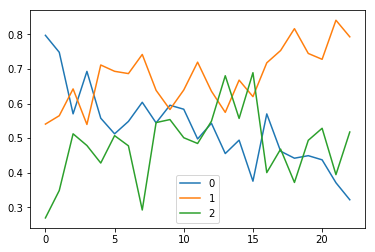

In [4]:
# RL method weights
for item in range(3):
    plt.plot(np.array(weights_list)[:, item], label=item)
plt.legend()

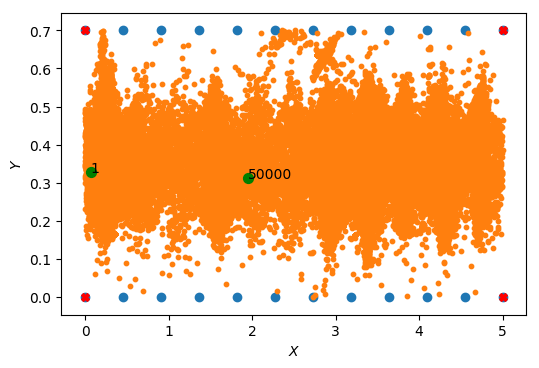

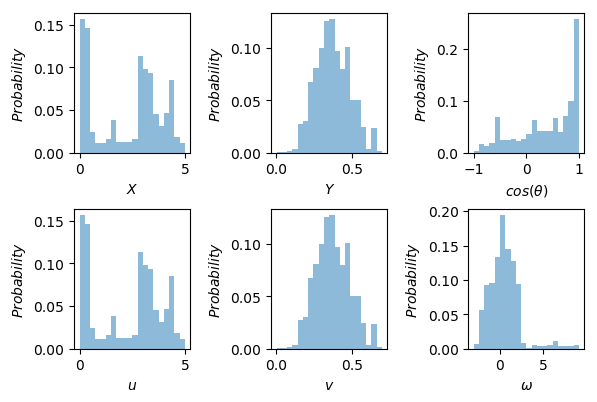

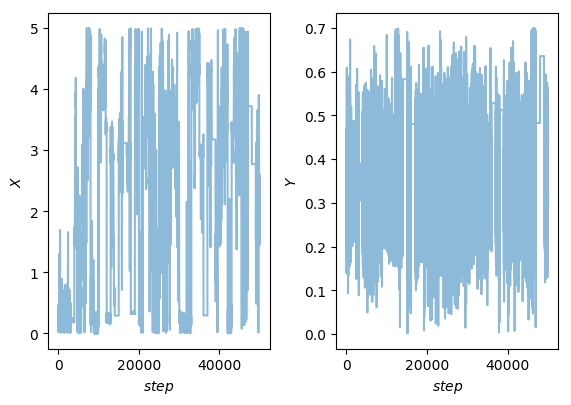

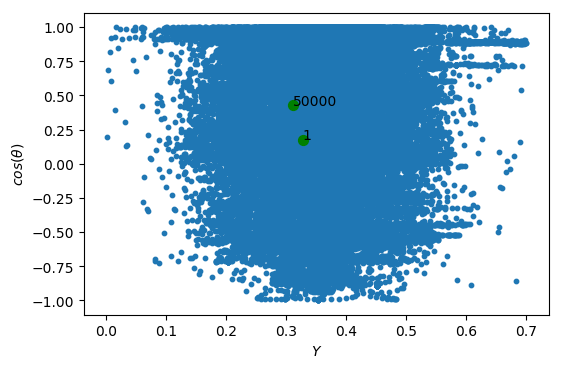

0

In [5]:
# visualize RL final results
visual(coords_negative_particles,coords_particles,np.concatenate(my_positions_list),
       np.concatenate(my_positions_list),dpivalue = 100)

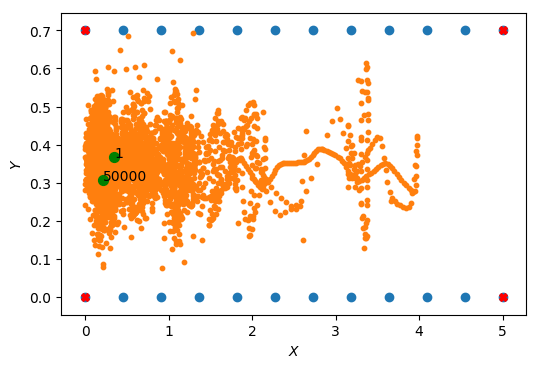

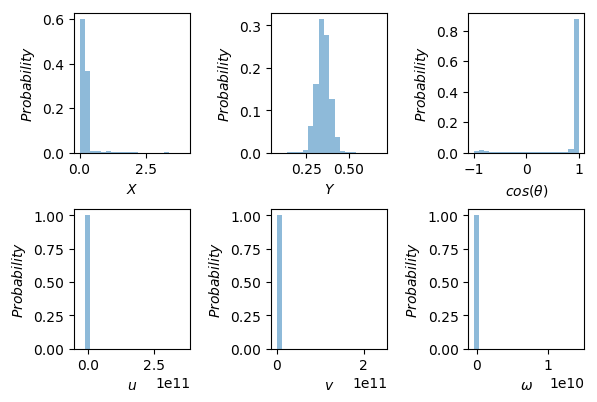

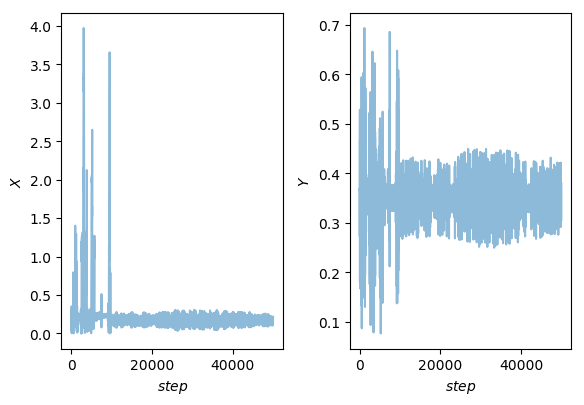

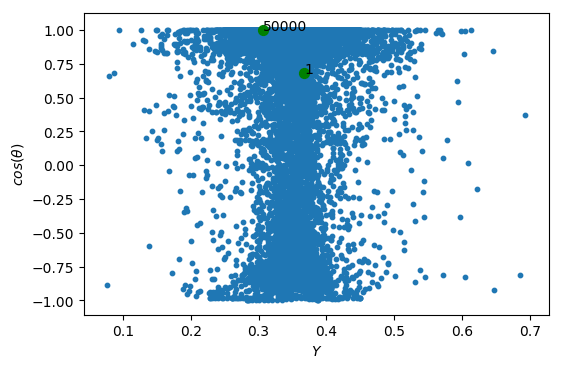

0

In [6]:
# conventional MD
my_positions, my_velocities, my_processtime = simulate(50000)
visual(coords_negative_particles,coords_particles,my_positions,my_velocities,dpivalue = 100)

In [11]:
# save results to file
with open('temp_RL_results.pkl', 'wb') as my_file:
    pickle.dump([my_positions_list, weights_list, starting_configs_list], my_file, pickle.HIGHEST_PROTOCOL)

In [12]:
# load results from file
my_positions_list, weights_list, starting_configs_list = pickle.load(open('temp_RL_results.pkl', 'rb'))